### For this exercise you need additional libraries

use `pip install` to add the following packages to your system
- tensorflow>=2.0
- pandas

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from io import BytesIO
import base64
import numpy as np
from IPython.display import display, HTML
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib notebook


# Neural Networks

In this task you start implementing a Neural Network using Tensorflow. Since version 2.0 of tensorflow, Keras is part of it. For the following task please use tf.keras to create a network.

- tf.keras.models.Sequential --> Allows you to create a sequential model
- tf.keras.layers.Dense --> A fully connected layers (MLP) 
- Each dense layer should have `sigmoid` as activation function
- A good starting point is the official documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

Create a model which is structures as follows:

```_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
=================================================================
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
```

If you are done with the implementation you have to train your model. In detail you will find a step by step guide here: https://www.tensorflow.org/guide/keras/overview.
For this task you have to use SGD as optimizer with a Momentum of 0.9 and a learning rate of 0.001. As loss function you have to use `sparse_categorical_crossentropy` and as metric during training to monitor, choose `accuracy`. Use x_train, y_train as training data and x_test, y_test as validation data! As last step you can train your model for 50 epochs and visualize the history object like below which you get as return value after model.fit is done.

![](resources/history.png)


Last but not least, below you have the black box where you can draw digits from 0 to 9 and use your already trained model to predict these drawn number. 

!!! IMPORTANT !!!
<span style="color:red">To work with the draw function below it's important that you name the variable which contains the tf.keras.model `model` otherwise the prediction wont work</span>

Things to experiment with:
- add some hidden layer or change the number of neurons
- normalize your data that the values are in the range of -1 and 1 instead of 0 to 255
- use tf.keras.optimizers.Adam instead of SGD
- try to use ReLU instead of Sigmoid and Softmax as activation function for the last layer

In [8]:
display(HTML(filename='resources/draw.html'))

In [13]:
def normalize(data):
    return (data / 255) * 2 - 1

# this method requires a variable with name "model" of type tf.keras.model somewhere defined in the notebook
# the method recives a base64 encoded image (the drawn image) from javascript and converts it into a Pil image
# don't touch it! :)
def predict(data, normalized=False):    
    im = Image.open(BytesIO(base64.b64decode(data))).resize(source_shape)
    im = np.array(im)[:,:,0].astype(np.float32) 
    
    if normalized:
        im = normalize(im)

    if len(model.input_shape[1:]) == 1:
        im = im.reshape(-1)
        im = np.expand_dims(im, 0)
    else:
        im = np.expand_dims(np.expand_dims(im,2), 0)
    res = model.predict(im)[0].argmax(-1)
    
    #print is required to inform javascript about the result
    print(res)    
    

In [14]:
model = tf.keras.models.load_model('trained_model.hdf5')
# model = tf.keras.models.load_model('example.hdf5')

## Load MNIST dataset
For our training we are using MNIST, a large database of handwritten digits. A sample how the data looks like is depicted below.

<img src="resources/MnistExamples.png" align="left"/>

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

source_shape = x_train.shape[1:]
x_train = x_train.reshape(x_train.shape[0], -1).astype(np.float32)
x_test = x_test.reshape(x_test.shape[0], -1).astype(np.float32)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train = normalize(x_train)
x_test =  normalize(x_test)

## Implementation

In [8]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(np.prod(x_train.shape[1:3]),)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
# model.input

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=.005, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9088 - loss: 0.2964 - val_accuracy: 0.9534 - val_loss: 0.1485
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9591 - loss: 0.1321 - val_accuracy: 0.9554 - val_loss: 0.1371
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9703 - loss: 0.0953 - val_accuracy: 0.9724 - val_loss: 0.0909
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0743 - val_accuracy: 0.9736 - val_loss: 0.0833
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9799 - loss: 0.0614 - val_accuracy: 0.9759 - val_loss: 0.0760
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0491 - val_accuracy: 0.9778 - val_loss: 0.0730
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9754 - val_loss: 0.0764
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0347 - 

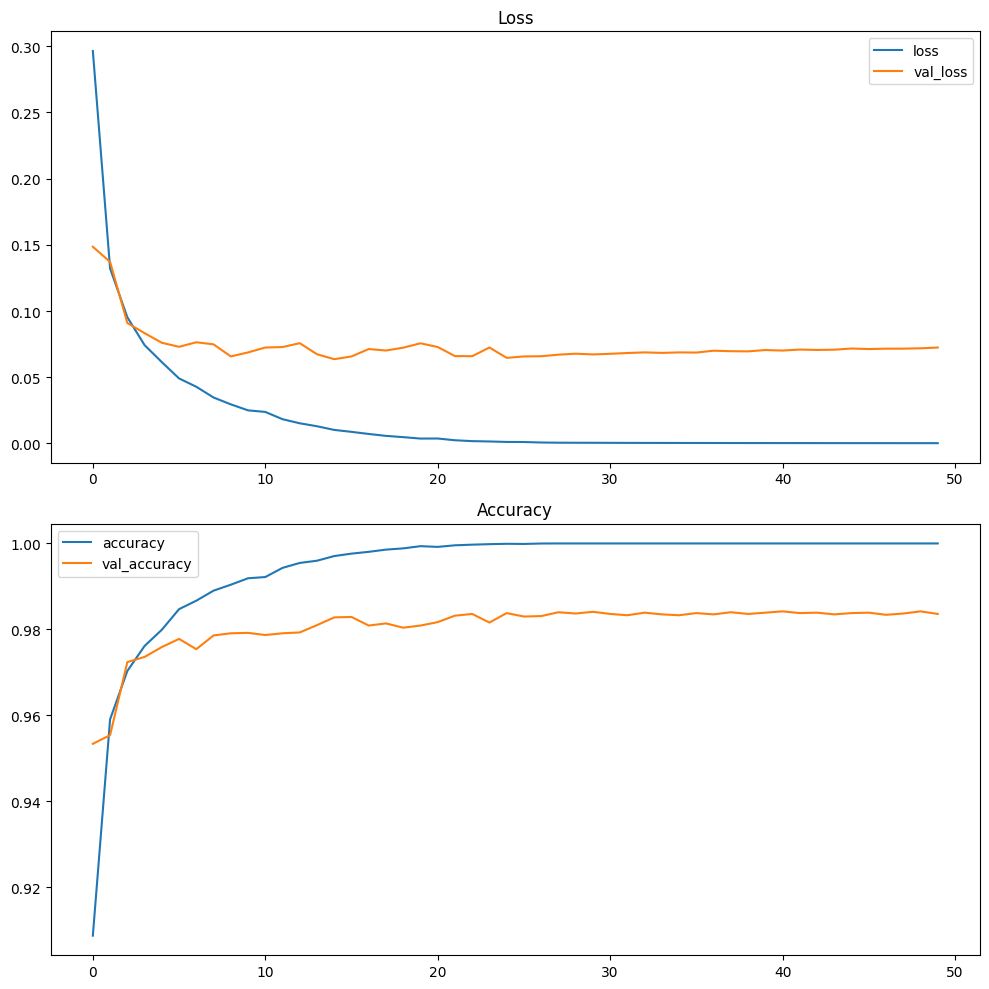

In [14]:
df = pd.DataFrame.from_dict(hist.history)

plt.figure(figsize=(10,10))
ax = plt.subplot(211)
df.plot(y="loss", ax=ax, title="Loss")
df.plot(y="val_loss", ax=ax)

ax = plt.subplot(212)
df.plot(y="accuracy", ax=ax, title="Accuracy")
df.plot(y="val_accuracy", ax=ax)
plt.tight_layout()

In [15]:
tf.keras.models.save_model(model, 'trained_model.hdf5')